In [0]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [0]:
K.image_data_format()

'channels_last'

In [0]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

In [0]:
print(x_train.shape)

(60000, 28, 28)


In [0]:
print(x_test.shape)

(10000, 28, 28)


### Reshape for CNN 

In [0]:
x_train = x_train.reshape(-1,28, 28, 1)   #Reshape for CNN -  should work!!
print(x_train.shape)

(60000, 28, 28, 1)


In [0]:
x_test = x_test.reshape(-1,28, 28, 1)
print(x_test.shape)

(10000, 28, 28, 1)


In [0]:
input_shape1 = (28, 28, 1)

### Hyper paramemters #학습에 사용되지만 사람이 바꿀 수 있는 숫자들

In [0]:
nb_epoch = 5
num_classes = 10
batch_size = 128

### Model definition

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape1))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.summary() #이게 중요함 서머리에 왜 저런 숫자들이 나왔나 cnn관련해서 파라미터 보는것. flatten 은 한줄로 피는거.  원래는 28X28짜리 이미지가 들어와서 flatten으로 한줄로 쭉 펴졌었음. 근데 이건 앞쪽에 flatten없음. 입력을 굳이 하나로 안핀다는 거임.
#2차원 이미지를 굳이 한줄로 만들었었음. 가위로 색종이 갈기갈기 잘라서 하나 실로 = 1차원으로 만들어 붙였었음. 실이 들어가서 10개 중 하나의 확률로 나왔었음 근데 이 방법의 문제점이 뭐냐.. 입력데이터의 형상이 무시됨!! 잘라서 하나로 이어서 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

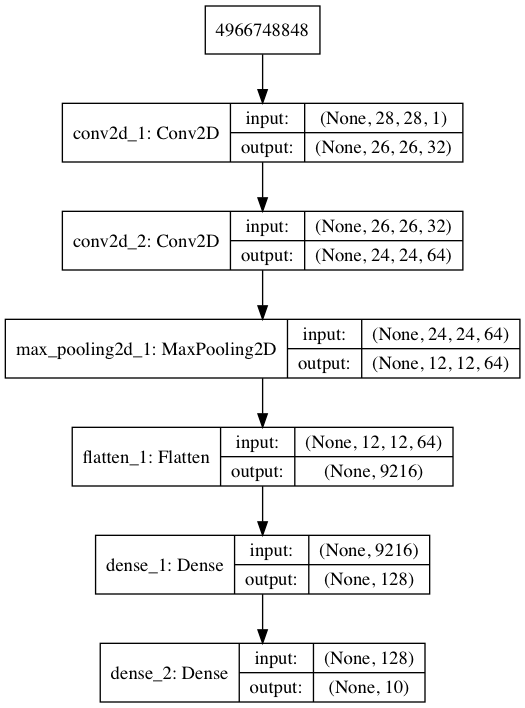

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='modelCNN.png', show_shapes=True)
from IPython.display import Image
Image("modelCNN.png")

In [0]:
model.fit(x_train, y_train, epochs=nb_epoch)

Epoch 1/5
60000/60000 [==============================] - 124s 2ms/step - loss: 0.1084 - acc: 0.9667
Epoch 2/5
60000/60000 [==============================] - 128s 2ms/step - loss: 0.0362 - acc: 0.9887
Epoch 3/5
60000/60000 [==============================] - 124s 2ms/step - loss: 0.0225 - acc: 0.9931
Epoch 4/5
60000/60000 [==============================] - 118s 2ms/step - loss: 0.0152 - acc: 0.9951
Epoch 5/5
60000/60000 [==============================] - 125s 2ms/step - loss: 0.0104 - acc: 0.9965


### *Real World Challenge*: Difference between training and testing set accuracy

#### Test accuracy

In [0]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 7s 695us/step


In [0]:
score

[0.03935691009378679, 0.9896]

In [0]:
print('Test loss:{}'.format(score[0]))
print('Test accuracy:{}'.format(score[1]))

Test loss:0.03935691009378679
Test accuracy:0.9896


#### Training accuarcy

In [0]:
score = model.evaluate(x_train, y_train)

60000/60000 [==============================] - 38s 637us/step


In [0]:
print('Training loss:{}'.format(score[0]))
print('Training accuracy:{}'.format(score[1]))

Training loss:0.008563152774783884
Training accuracy:0.9971166666666667


#### Q. What is the difference between the training and test accuracy ?